# Exploring Stack Exchance

While everyone *loves* a fun dataset to explore, good data is expensive. It costs a significant amount of resources to generate, accurately curate, securely store, and provide robust access to. For instance, our cold-storage tape archive, [Ranch](https://www.tacc.utexas.edu/systems/ranch), grows at a rate of 8.5PB (~5.3%) per year. Despite these costs, data is often invaluable to both users and administrators.

Today, we will be exploring data from Stack Exchange. While this is probably not the kind of data you interact with on a daily basis, everyone at this camp should have some familiarity from interacting with *at least* one [Stack Exchange Community](https://stackexchange.com/sites):

- StackOverflow
- Super User
- TeX - LaTeX
- ...and more

Today, you will be using python to explore question and answer history from the Stack Exchange site of your choice. This data will be accessed over their public API. This is their **actual** data, and these methods can be extended to a variety of other datasets and websites.

## Objectives

- Use python [requests](http://docs.python-requests.org/en/master/) to download data
- Import data into [Pandas](http://pandas.pydata.org/)
- Explore data
  - Inspect and summarize data
  - Group records
  - Select and subset records
  - Visualize selection
  - Join two datasets together

## Dependencies

We will be using the following non-standard python libraries:
- [**requests** library](http://docs.python-requests.org/en/master/) *\(Already Installed\)*
- [**pandas** library](http://pandas.pydata.org/) *\(Already Installed\)*

In [2]:
# Import necessary Libraries
import requests, json
import pandas as pd
# Render matplotlib in the notebook
%matplotlib inline

# Stack Exchange Questions

Stack Exchange has a [well documented API](https://api.stackexchange.com/), which contains enpoints for **each site**. You can perform any graphical interaction through the API while authenticated, but general information can also be retrieved anonymously. Just make sure you do not make more than 10,000 requests per day. (*I did while devloping this notebook*)

Beginning with the initial questsions submitted by users, take a look at the

[Questions API](https://api.stackexchange.com/docs/questions)

webapp on the Stack Exchange site, and build a query that you would like to use with Python.

## Goals

- Choose a site (default is StackOverflow)
- Choose Start and/or End Date
- Sort by creation
- Limit the number of questions to 10 (`pagesize`)

# Make API Request

In [3]:
# API URL
url = 'https://api.stackexchange.com/2.2/questions'

params = dict(
    site='stackoverflow', # stackoverflow (coding) questions
    pagesize='10',        # Number of questions to return
    fromdate='1500163200',# Get epoch time from webapp
    order='desc',
    sort='creation'
)

resp = requests.get(url=url, params=params)
data = json.loads(resp.text)

print(json.dumps(data, indent=3))

{
   "items": [
      {
         "tags": [
            "c#",
            "visual-studio",
            "google-maps",
            "asp.net-web-api"
         ],
         "owner": {
            "reputation": 1,
            "user_id": 3077751,
            "user_type": "registered",
            "profile_image": "https://www.gravatar.com/avatar/5c74048e51703fb422d38243aee36f4b?s=128&d=identicon&r=PG&f=1",
            "display_name": "user3077751",
            "link": "https://stackoverflow.com/users/3077751/user3077751"
         },
         "is_answered": false,
         "view_count": 1,
         "answer_count": 0,
         "score": 0,
         "last_activity_date": 1543351758,
         "creation_date": 1543351758,
         "question_id": 53507921,
         "link": "https://stackoverflow.com/questions/53507921/html-formated-text-from-database-is-displayed-like-plain-text-in-content-window",
         "title": "HTML formated text from database is displayed like plain text in content window of 

Great! If you kept `pagesize` at 10, you should have a JSON response of 10 questions. If you decided to crank up your response size, you might have to scroll a bit.

## JSON Structure

This JSON response probably looks familiar if you have ever worked with Python dictionaries in the past. At the most basic level, a JSON is a collection of key and value pairs.

```json
{
    "key1": value1,
    "key2": value2
}
```

Instead of using a numerical index, you refer to each value with the corresponding key.

- key1
- key2

This makes both the data structure and programatic access human-readable. However, the lack of indicies makes traditional access through looping somewhat difficult.

In [4]:
# Print first question title
############################
# Pull "items" json
#  > Pull first record
#    > Pull title
print(data['items'][0]['title'])

HTML formated text from database is displayed like plain text in content window of Google map marker


In [5]:
# You need to know the exact key names to traverse it
for item in data['items']:
    # Print the question title
    print("TAGS - %s"%(item['title']))
    # Print the question tags
    print("   [%s]\n"%(", ".join(item['tags'])))

TAGS - HTML formated text from database is displayed like plain text in content window of Google map marker
   [c#, visual-studio, google-maps, asp.net-web-api]

TAGS - pretty Output in XML
   [java, node.js, xml, xml-parsing, pretty-print]

TAGS - Instantiating prefabs from an imported string to form a tile map
   [c#, unity3d, instantiation]

TAGS - Matplotlib plot_surface colormap ignores vmin and vmax
   [matplotlib]

TAGS - How to increase the limit of email you can bulk send on SuiteCRM?
   [sugarcrm, suitecrm]

TAGS - sort and show the number of digits
   [c++, sorting, logic, cout]

TAGS - Marketing - Technology for Website for Non-sharing Course Online
   [javascript, sql, wordpress]

TAGS - How to camera scroll Python Pygame
   [python, scroll, camera, pygame]

TAGS - Retrieving Records from oauth2_provider_grant table in Django Oauth Toolkit
   [django, oauth, toolkit]

TAGS - ggplot2 map is blank
   [r, ggplot2, shapes]



## Explore

- Try pulling out the `answer_count` for each question
- Try pulling out the `view_count` for each question
- Try pulling out the submission date.
- **Extra Credit** - [Convert the epoch time to human readable](https://stackoverflow.com/a/12400584)

# Converting to Pandas

Instead of testing you on your ability to traverse a JSON tree, the goal for today is to explore data using Pandas, so lets convert the JSON to a DataFrame.

In [6]:
questionsDF = pd.io.json.json_normalize(data['items'])
questionsDF

,answer_count,creation_date,is_answered,last_activity_date,last_edit_date,link,owner.accept_rate,owner.display_name,owner.link,owner.profile_image,owner.reputation,owner.user_id,owner.user_type,question_id,score,tags,title,view_count
0,0,1543351758,False,1543351758,NaN,https://stackoverflow.com/questions/53507921/h...,NaN,user3077751,https://stackoverflow.com/users/3077751/user30...,https://www.gravatar.com/avatar/5c74048e51703f...,1,3077751,registered,53507921,0,"[c#, visual-studio, google-maps, asp.net-web-api]",HTML formated text from database is displayed ...,1
1,0,1543351752,False,1543351752,NaN,https://stackoverflow.com/questions/53507920/p...,NaN,Usman Hassan Chattha,https://stackoverflow.com/users/10532270/usman...,https://www.gravatar.com/avatar/51c19d8d271172...,25,10532270,registered,53507920,0,"[java, node.js, xml, xml-parsing, pretty-print]",pretty Output in XML,1
2,0,1543351743,False,1543351743,NaN,https://stackoverflow.com/questions/53507919/i...,NaN,Roodolpha,https://stackoverflow.com/users/5601262/roodolpha,https://www.gravatar.com/avatar/35b56e59f7f4ee...,10,5601262,registered,53507919,0,"[c#, unity3d, instantiation]",Instantiating prefabs from an imported string ...,3
3,0,1543351734,False,1543351734,NaN,https://stackoverflow.com/questions/53507918/m...,NaN,AgvaniaRekuva,https://stackoverflow.com/users/9035298/agvani...,https://www.gravatar.com/avatar/764a20395c9998...,52,9035298,registered,53507918,0,[matplotlib],Matplotlib plot_surface colormap ignores vmin ...,2
4,0,1543351721,False,1543351721,NaN,https://stackoverflow.com/questions/53507916/h...,60.0,Tim Cooley,https://stackoverflow.com/users/1516332/tim-co...,https://www.gravatar.com/avatar/952facc981d00c...,332,1516332,registered,53507916,0,"[sugarcrm, suitecrm]",How to increase the limit of email you can bul...,2
5,0,1543351720,False,1543351720,NaN,https://stackoverflow.com/questions/53507915/s...,NaN,ali farokhi,https://stackoverflow.com/users/10183983/ali-f...,https://www.gravatar.com/avatar/1e680f0c751d4a...,1,10183983,registered,53507915,0,"[c++, sorting, logic, cout]",sort and show the number of digits,5
6,0,1543351716,False,1543351716,NaN,https://stackoverflow.com/questions/53507913/m...,NaN,Mayank Sharma,https://stackoverflow.com/users/10713749/mayan...,https://graph.facebook.com/2707820412689588/pi...,1,10713749,registered,53507913,0,"[javascript, sql, wordpress]",Marketing - Technology for Website for Non-sha...,3
7,0,1543351710,False,1543351710,NaN,https://stackoverflow.com/questions/53507912/h...,NaN,travisp4,https://stackoverflow.com/users/10709084/travisp4,https://www.gravatar.com/avatar/3f94cbc6313692...,14,10709084,registered,53507912,0,"[python, scroll, camera, pygame]",How to camera scroll Python Pygame,3
8,0,1543351707,False,1543351707,NaN,https://stackoverflow.com/questions/53507911/r...,31.0,Foobar,https://stackoverflow.com/users/3825948/foobar,https://www.gravatar.com/avatar/82ada1cb7432ff...,126,3825948,registered,53507911,0,"[django, oauth, toolkit]",Retrieving Records from oauth2_provider_grant ...,2
9,0,1543351687,False,1543351751,1.543352e+09,https://stackoverflow.com/questions/53507907/g...,NaN,jciconsult,https://stackoverflow.com/users/1382401/jcicon...,https://www.gravatar.com/avatar/cb480d05ebd644...,11,1382401,registered,53507907,0,"[r, ggplot2, shapes]",ggplot2 map is blank,3


[`json_normalize`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html) takes a nested JSON and flattens it into a table. In our case, it flattened each return question in the `items` list. Child JSONs like owner, which described the original submitter, now have owner as a prefix in the column name.

### JSON
```
"owner": {
            "reputation": 1,
            "user_id": 6140730,
            "user_type": "registered",
            "profile_image": "https://www.gravatar.com/avatar/efa02138df0bc1f59618c365872caed6?s=128&d=identicon&r=PG&f=1",
            "display_name": "John",
            "link": "https://stackoverflow.com/users/6140730/john"
         }
```
### Table

| Column Name | Value |
|--|--|
| owner.reputation | 1 |
| owner.user_id | 6140730 |
| owner.user_type | registered |
| owner.profile_image | https://www... |
| owner.display_name | John |
| owner.link | https://stackoverflow... |

# Exploring the Data

When we transform the JSON data into a table, using `json_normalize`, the resulting table is actually a [Pandas DataFrame.](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

A DataFrame is a 2-dimensional data structure that can store data of different types

(characters, integers, floating point values, factors, and more)

in columns. It is similar to a spreadsheet or an SQL table or the data.frame in R. A DataFrame always has an index (0-based). An index refers to the row of an element in the data structure.

You can see the **bold** index column on the left of our example.

## Viewing DataFrame Attributes

Besides having text column headers, DataFrames come with some nice attributes and methods to view specific parts of the data.

## Columns

You often need to iterate over the columns of your table, and DataFrames expose those names

In [7]:
print(questionsDF.columns)

Index(['answer_count', 'creation_date', 'is_answered', 'last_activity_date',
       'last_edit_date', 'link', 'owner.accept_rate', 'owner.display_name',
       'owner.link', 'owner.profile_image', 'owner.reputation',
       'owner.user_id', 'owner.user_type', 'question_id', 'score', 'tags',
       'title', 'view_count'],
      dtype='object')


## Shape

You can also see how many rows and columns (rows, columns) are in your DataFrame by accessing the shape attribute.

In [8]:
print(questionsDF.shape)

(10, 18)


## Head

If you have ever used the `head` command on a terminal to view the first N lines of a file, the head function of a DataFrame will look familiar to you. This is great for just peeking at the data and not overflowing your window.

In [ ]:
questionsDF.head()
#questionsDF.head(2)

## Tail

There is also a tail command for looking at the last N rows of a DataFrame.

In [ ]:
questionsDF.tail()
#questionsDF.tail(2)

# Grouping Records

Many of the columns in this data, like `owner.link`, may not be immediately useful to us. With a DataFrame, you can select and group specific columns for use in a downstream analysis without losing the original.

For example, we could be interested in the `view_count` of each question. An analysis of this column could show how many people also encounter a similar problem and needed to seek help on Stack Exchange.

## Column Groups

We can pull out this single column using two methods.

In [9]:
# Dot
print(questionsDF.view_count.head())
# Bracket
print(questionsDF['view_count'].head())

0    1
1    1
2    3
3    2
4    2
Name: view_count, dtype: int64
0    1
1    1
2    3
3    2
4    2
Name: view_count, dtype: int64


We can also produce similar statistics provided by the `summary()` function in R with the `describe()` function. This can be applied directly to our column selection as so.

In [10]:
questionsDF['view_count'].describe()

count    10.000000
mean      2.500000
std       1.178511
min       1.000000
25%       2.000000
50%       2.500000
75%       3.000000
max       5.000000
Name: view_count, dtype: float64

Besides only using the first 10 questions in my example data, they're all very new, so they have very few views. Lets instead work on the latest 1,000 questions and generate the same description. Stack Exchange [limits](https://api.stackexchange.com/docs/throttle) the `pagesize` of the response to 100, so we will be pulling the first 10 pages.

In [11]:
# Latest 1000 questions

# Params pull 100 questsions per query
params = dict(
    site='stackoverflow',
    pagesize='100',
    page='1',
    order='desc',
    sort='creation'
)

nPages = 10 #How many pages you want
data = []

import sys
print("Reading Page:")
for page in map(str, range(1,nPages+1)):
    params['page']=page # Change page number
    if int(page) > 1: sys.stdout.write(", ")
    sys.stdout.write("%s"%(page))
    data += json.loads(requests.get(url=url, params=params).text)['items']

questionsDF = pd.io.json.json_normalize(data)
# Drop the "migrated_from" columns
questionsDF = questionsDF[list(filter(lambda x: 'migrated' not in x, questionsDF.columns))]

questionsDF['view_count'].describe()

Reading Page:
1, 2, 3, 4, 5, 6, 7, 8, 9, 10

count    1000.000000
mean       12.621000
std         9.753794
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        67.000000
Name: view_count, dtype: float64

Now that we have a larger pool of data, you should check out other statistics that can be generated per column. Feel free to use another numerical column as well.

## Explore

There are a bunch of [built in](https://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) descriptive functions, but these are good to check out.

- describe()
- nuniqe()
- value_counts()

In [12]:
# How many unique users?
questionsDF['owner.user_id'].head()

0    2730554
1    4611186
2    7667750
3    4279496
4    9328818
Name: owner.user_id, dtype: int64

## Two-Way Groups

If you ever want to summarize by one or more variables, you can use the `groupby` method. In our case, it would be interesting to look at `view_count` statistics of answered and unanswered questions.

In [13]:
questionsDF.groupby('is_answered')['view_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_answered,,,,,,,,
False,863.0,11.098494,8.638031,1.0,5.0,9.0,14.0,65.0
True,137.0,22.211679,10.887412,4.0,14.0,21.0,29.0,67.0


We can see that while there are fewer answered questions, their view count (in my test) is almost 100% higher. Neat!

## Explore

Take some time using the `groupby` method to explore other cool trends.

- Owner reputation - Is the submitter a bot?
- Score - Is the question real?

In [14]:
questionsDF.groupby('is_answered')['owner.reputation'].describe()

,count,mean,std,min,25%,50%,75%,max
is_answered,,,,,,,,
False,863.0,757.397451,3120.901010,1.0,1.0,21.0,247.0,42577.0
True,137.0,782.781022,2797.996302,1.0,8.0,37.0,242.0,27226.0


# Selecting and Subsetting Records

You can also select a subset of the data using criteria. For example, we can select all rows that have a `view_count` greater than 5.

In [15]:
questionsDF[questionsDF.view_count > 5]

,accepted_answer_id,answer_count,closed_date,closed_reason,creation_date,is_answered,last_activity_date,last_edit_date,link,owner.accept_rate,...,owner.link,owner.profile_image,owner.reputation,owner.user_id,owner.user_type,question_id,score,tags,title,view_count
11,NaN,0,NaN,NaN,1543351879,False,1543351879,NaN,https://stackoverflow.com/questions/53507947/c...,NaN,...,https://stackoverflow.com/users/10713761/elija...,https://lh5.googleusercontent.com/-XYE10C7tqkY...,1,10713761,registered,53507947,0,"[javascript, json]",Checking for part of a key value pair,7
12,NaN,0,NaN,NaN,1543351867,False,1543351867,NaN,https://stackoverflow.com/questions/53507944/r...,NaN,...,https://stackoverflow.com/users/1068671/dustin,https://i.stack.imgur.com/L19U5.jpg?s=128&g=1,85,1068671,registered,53507944,0,"[c#, wpf, reactiveui, multidatatrigger]",RxUI - WPF - Style DataTrigger binding with no...,6
19,NaN,0,NaN,NaN,1543351801,False,1543351929,1.543352e+09,https://stackoverflow.com/questions/53507925/d...,NaN,...,https://stackoverflow.com/users/10410598/damerian,https://www.gravatar.com/avatar/7b3288938f1c37...,5,10410598,registered,53507925,-1,"[pseudocode, dijkstra]",Dijkstra&#39;s Algorithm pseudocode &quot;U&qu...,13
21,NaN,0,NaN,NaN,1543351752,False,1543351752,NaN,https://stackoverflow.com/questions/53507920/p...,NaN,...,https://stackoverflow.com/users/10532270/usman...,https://www.gravatar.com/avatar/51c19d8d271172...,25,10532270,registered,53507920,0,"[java, node.js, xml, xml-parsing, pretty-print]",pretty Output in XML,11
22,NaN,0,NaN,NaN,1543351743,False,1543351743,NaN,https://stackoverflow.com/questions/53507919/i...,NaN,...,https://stackoverflow.com/users/5601262/roodolpha,https://www.gravatar.com/avatar/35b56e59f7f4ee...,10,5601262,registered,53507919,0,"[c#, unity3d, instantiation]",Instantiating prefabs from an imported string ...,8
23,NaN,0,NaN,NaN,1543351734,False,1543351734,NaN,https://stackoverflow.com/questions/53507918/m...,NaN,...,https://stackoverflow.com/users/9035298/agvani...,https://www.gravatar.com/avatar/764a20395c9998...,57,9035298,registered,53507918,1,[matplotlib],Matplotlib plot_surface colormap ignores vmin ...,7
25,NaN,0,NaN,NaN,1543351720,False,1543351720,NaN,https://stackoverflow.com/questions/53507915/s...,NaN,...,https://stackoverflow.com/users/10183983/ali-f...,https://www.gravatar.com/avatar/1e680f0c751d4a...,1,10183983,registered,53507915,0,"[c++, sorting, logic, cout]",sort and show the number of digits,17
26,NaN,0,NaN,NaN,1543351716,False,1543351716,NaN,https://stackoverflow.com/questions/53507913/m...,NaN,...,https://stackoverflow.com/users/10713749/mayan...,https://graph.facebook.com/2707820412689588/pi...,1,10713749,registered,53507913,0,"[javascript, sql, wordpress]",Marketing - Technology for Website for Non-sha...,9
27,NaN,0,NaN,NaN,1543351710,False,1543351710,NaN,https://stackoverflow.com/questions/53507912/h...,NaN,...,https://stackoverflow.com/users/10709084/travisp4,https://www.gravatar.com/avatar/3f94cbc6313692...,14,10709084,registered,53507912,0,"[python, scroll, camera, pygame]",How to camera scroll Python Pygame,6
29,NaN,0,NaN,NaN,1543351687,False,1543351751,1.543352e+09,https://stackoverflow.com/questions/53507907/g...,NaN,...,https://stackoverflow.com/users/1382401/jcicon...,https://www.gravatar.com/avatar/cb480d05ebd644...,11,1382401,registered,53507907,0,"[r, ggplot2, shapes]",ggplot2 map is blank,8


## Explore

Experiment with the

- `>`, `<`
- `==`, `!=`
- `>=`, `<=`

operators on numerical data. If you have extra time, look for questions that contain tags that you know. The tags are actually a list, so you can search for tags using the `in` operator.

In [16]:
# Need to use the map operation on tags
questionsDF[questionsDF.tags.map(lambda x: 'python' in x)]

,accepted_answer_id,answer_count,closed_date,closed_reason,creation_date,is_answered,last_activity_date,last_edit_date,link,owner.accept_rate,...,owner.link,owner.profile_image,owner.reputation,owner.user_id,owner.user_type,question_id,score,tags,title,view_count
0,NaN,0,NaN,NaN,1543352002,False,1543352002,NaN,https://stackoverflow.com/questions/53507974/p...,80.0,...,https://stackoverflow.com/users/2730554/mhelpme,https://www.gravatar.com/avatar/d6682e696c4f94...,1938,2730554,registered,53507974,0,"[python, python-3.x, spyder]",placing a breakpoint in spyder and getting the...,1
4,NaN,0,NaN,NaN,1543351940,False,1543351940,NaN,https://stackoverflow.com/questions/53507964/d...,100.0,...,https://stackoverflow.com/users/9328818/dan,https://www.gravatar.com/avatar/7a4b8f518bb631...,41,9328818,registered,53507964,0,"[python, django]",Django Return File and Template,3
27,NaN,0,NaN,NaN,1543351710,False,1543351710,NaN,https://stackoverflow.com/questions/53507912/h...,NaN,...,https://stackoverflow.com/users/10709084/travisp4,https://www.gravatar.com/avatar/3f94cbc6313692...,14,10709084,registered,53507912,0,"[python, scroll, camera, pygame]",How to camera scroll Python Pygame,6
31,NaN,0,NaN,NaN,1543351652,False,1543351652,NaN,https://stackoverflow.com/questions/53507902/h...,100.0,...,https://stackoverflow.com/users/8312185/tushar...,https://www.gravatar.com/avatar/e76c393a23847c...,249,8312185,registered,53507902,0,"[python, scikit-learn, decision-tree, encoder]",How may I un-encode the features from a decisi...,4
33,NaN,1,NaN,NaN,1543351639,False,1543351901,1.543352e+09,https://stackoverflow.com/questions/53507896/h...,NaN,...,https://stackoverflow.com/users/10388036/yuhyut,https://www.gravatar.com/avatar/687d284036d440...,1,10388036,registered,53507896,-2,"[python, file]",How to rename a temporary file?,20
48,NaN,0,NaN,NaN,1543351575,False,1543351575,NaN,https://stackoverflow.com/questions/53507873/c...,20.0,...,https://stackoverflow.com/users/5969679/t-reed,https://www.gravatar.com/avatar/cfbe91b99d5469...,36,5969679,registered,53507873,0,"[python, bash]",Case insensitive dictionary lookup in Python o...,17
68,NaN,0,NaN,NaN,1543351414,False,1543351414,NaN,https://stackoverflow.com/questions/53507837/g...,64.0,...,https://stackoverflow.com/users/1161300/tom-ve...,https://www.gravatar.com/avatar/65bc8d95ba8633...,56,1161300,registered,53507837,0,"[python, apache-spark, scikit-learn, pyspark]",GMM: convert scikit-learn&#39;s score_samples ...,5
90,NaN,0,NaN,NaN,1543351316,False,1543351316,NaN,https://stackoverflow.com/questions/53507804/i...,82.0,...,https://stackoverflow.com/users/3667551/starchand,https://www.gravatar.com/avatar/e08456a85bc845...,378,3667551,registered,53507804,0,"[python, machine-learning, scikit-learn]",Incremental learning in Scikit-learn,10
96,NaN,0,NaN,NaN,1543351274,False,1543351274,NaN,https://stackoverflow.com/questions/53507793/d...,NaN,...,https://stackoverflow.com/users/6646748/mago,https://lh3.googleusercontent.com/-Z7Sy_8bk5MU...,131,6646748,registered,53507793,3,"[python, pandas, pandas-groupby]",df.loc[] with multiple callables,17
102,NaN,0,NaN,NaN,1543351209,False,1543351209,NaN,https://stackoverflow.com/questions/53507779/l...,NaN,...,https://stackoverflow.com/users/10145793/romeo...,https://www.gravatar.com/avatar/8b791e7bdeab70...,35,10145793,registered,53507779,0,"[python, django, python-social-auth]",Logging out with Python Social Auth,4


# Visualizing the Results

While the tables we have been generating are nice, they still contain thousands of rows. A single figure could help visualize the data as a whole. Insead of crafting specific matplotlib calls, Pandas built a universal [`plot()` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) into the DataFrame object to simplify figure generation.

By stating that we want to generate a histogram with `kind='hist'`, we can look at the `view_count` fequency.

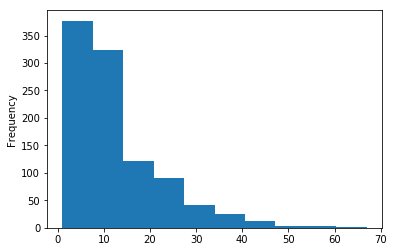

In [17]:
questionsDF['view_count'].plot(kind='hist')
# Try increasing the resolution with the "bins" parameter
# Try a square root transform of the view count

We can also plot our two-way tables.

is_answered
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: view_count, dtype: object

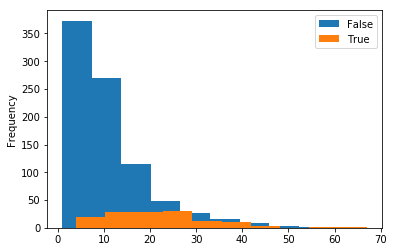

In [18]:
questionsDF.groupby('is_answered')['view_count'].plot(kind='hist', legend=True)

## Explore

Try generating a few figures on your own.

# Joining Tables

You can even join two datasets. Lets grab some answers so we can try joining them to their corresponding questions.

In [19]:
url = 'https://api.stackexchange.com/2.2/answers'
params = dict(
    site='stackoverflow',
    pagesize='100',
    page='1',
    order='desc',
    sort='creation'
)

nPages = 10 #How many pages you want
data = []

import sys
print("Reading Page:")
for page in map(str, range(1,nPages+1)):
    params['page']=page # Change page number
    if int(page) > 1: sys.stdout.write(", ")
    sys.stdout.write("%s"%(page))
    data += json.loads(requests.get(url=url, params=params).text)['items']

answersDF = pd.io.json.json_normalize(data)
answersDF.head()

Reading Page:
1, 2, 3, 4, 5, 6, 7, 8, 9, 10

,answer_id,creation_date,is_accepted,last_activity_date,last_edit_date,owner.accept_rate,owner.display_name,owner.link,owner.profile_image,owner.reputation,owner.user_id,owner.user_type,question_id,score
0,53508056,1543352353,False,1543352353,NaN,75.0,Kevin,https://stackoverflow.com/users/6321291/kevin,https://www.gravatar.com/avatar/25f2ca2f73db77...,1524,6321291,registered,53506973,0
1,53508053,1543352338,False,1543352338,NaN,80.0,Mark Meyer,https://stackoverflow.com/users/3874623/mark-m...,https://i.stack.imgur.com/zos0K.jpg?s=128&g=1,30197,3874623,registered,53507972,0
2,53508052,1543352331,False,1543352331,NaN,NaN,Holly Plyler,https://stackoverflow.com/users/10028531/holly...,https://lh4.googleusercontent.com/-5QOqJmW9BfE...,17,10028531,registered,53507888,0
3,53508051,1543352328,False,1543352328,NaN,70.0,Larry K,https://stackoverflow.com/users/64904/larry-k,https://www.gravatar.com/avatar/d18e711c185501...,32688,64904,registered,53508050,0
4,53508049,1543352325,False,1543352325,NaN,NaN,Kamil Cuk,https://stackoverflow.com/users/9072753/kamil-cuk,https://www.gravatar.com/avatar/e53715466e56b2...,7484,9072753,registered,53507523,0


## Inner Join

We can return the intersection of all questions that also map to an answer by using an inner join. Assuming we had the following example data:

```
Questions
---------------------
QuestionID 0  1  2  3
ViewCount  2  4  10 7
AnswerID   NA 1  2  3

Answers
---------------------
QuestionID 5  1  2  3
Score      3  5  3  1
AnswerID   0  1  2  3
```

An inner join would yield

```
Questions X Answers
---------------------
QuestionID 1  2  3
ViewCount  4  10 7
Score      5  3  1
AnswerID   1  2  3
```

We join both `questionsDF` and `answersDF` on the `question_id` column that they both share.

In [20]:
merged = pd.merge(left=questionsDF, right=answersDF[['answer_id','question_id']], left_on="question_id", right_on="question_id")
print(merged.shape)
merged.head()
print(questionsDF.columns)

(447, 22)
Index(['accepted_answer_id', 'answer_count', 'closed_date', 'closed_reason',
       'creation_date', 'is_answered', 'last_activity_date', 'last_edit_date',
       'link', 'owner.accept_rate', 'owner.display_name', 'owner.link',
       'owner.profile_image', 'owner.reputation', 'owner.user_id',
       'owner.user_type', 'question_id', 'score', 'tags', 'title',
       'view_count'],
      dtype='object')


## Left Join

Left joins return all items from the first set, and any items from the second set that overlap with the first. This is useful if we want ALL questions returned, and any questions that also match.

Using the table from the first example, a left join would yield

```
Questions LJ Answers
---------------------
QuestionID 0  1  2  3
ViewCount  2  4  10 7
Score      NA 5  3  1
AnswerID   NA 1  2  3
```

Notice that whenever there is no match on the right, fields are filled in as NA.

In [21]:
merged = pd.merge(left=questionsDF, right=answersDF, left_on="question_id", right_on="question_id", how="left")
print(merged.shape)
merged.head()

(1123, 34)


,accepted_answer_id,answer_count,closed_date,closed_reason,creation_date_x,is_answered,last_activity_date_x,last_edit_date_x,link,owner.accept_rate_x,...,last_activity_date_y,last_edit_date_y,owner.accept_rate_y,owner.display_name_y,owner.link_y,owner.profile_image_y,owner.reputation_y,owner.user_id_y,owner.user_type_y,score_y
0,NaN,0,NaN,NaN,1543352002,False,1543352002,NaN,https://stackoverflow.com/questions/53507974/p...,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,NaN,NaN,1543352001,False,1543352001,NaN,https://stackoverflow.com/questions/53507973/d...,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,NaN,NaN,1543352000,False,1543352000,NaN,https://stackoverflow.com/questions/53507972/w...,NaN,...,1.543352e+09,NaN,80.0,Mark Meyer,https://stackoverflow.com/users/3874623/mark-m...,https://i.stack.imgur.com/zos0K.jpg?s=128&g=1,30197.0,3874623.0,registered,0.0
3,NaN,0,NaN,NaN,1543352000,False,1543352000,NaN,https://stackoverflow.com/questions/53507972/w...,NaN,...,1.543352e+09,NaN,83.0,Chris Tavares,https://stackoverflow.com/users/422289/chris-t...,https://www.gravatar.com/avatar/4e5f72d9050f96...,18659.0,422289.0,registered,1.0
4,NaN,0,NaN,NaN,1543351996,False,1543351996,NaN,https://stackoverflow.com/questions/53507971/h...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore

There are also Right and Outer joins to explore. Take a look at [the documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) and see if you can discover anythign fun.

In [ ]:
# Try joining some data